In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import panel as pn
pn.extension('katex') 

In [2]:
r9_1= pn.pane.Markdown("""
A gravel layer with a thickness of 2.5 m is embedded between two sand layers. Both sand layers have a thickness of 
1.5 m and a hydraulic conductivity of 3.7·10<sup>-4</sup> m/s. Steady-state groundwater flow is perpendicular to the layering. 
An overall head difference of 5.5 cm and a discharge of 500 l/d per unit area have been determined <br><br>

**a.** Determine the effective hydraulic conductivity.<br><br>
**b.** What is the hydraulic conductivity of the gravel layer?<br><br>
**c.** Which effective hydraulic conductivity would be obtained if flow was assumed to be in parallel with the layering?<br><br>
**d.** Calculate effective hydraulic conductivity if the angle between the flow direction and the layering equals 30°. <br>

""", width = 900, styles={'font-size': '12pt'})
r9_1


Markdown(str, styles={'font-size': '12pt'}, width=900)

Column
    [0] Markdown(str, styles={'font-size': '12pt'})
    [1] PNG(str, align='center', name='Well 1', width=350)
    [2] LaTeX(str, renderer='katex', styles={'font-size': '12pt'})
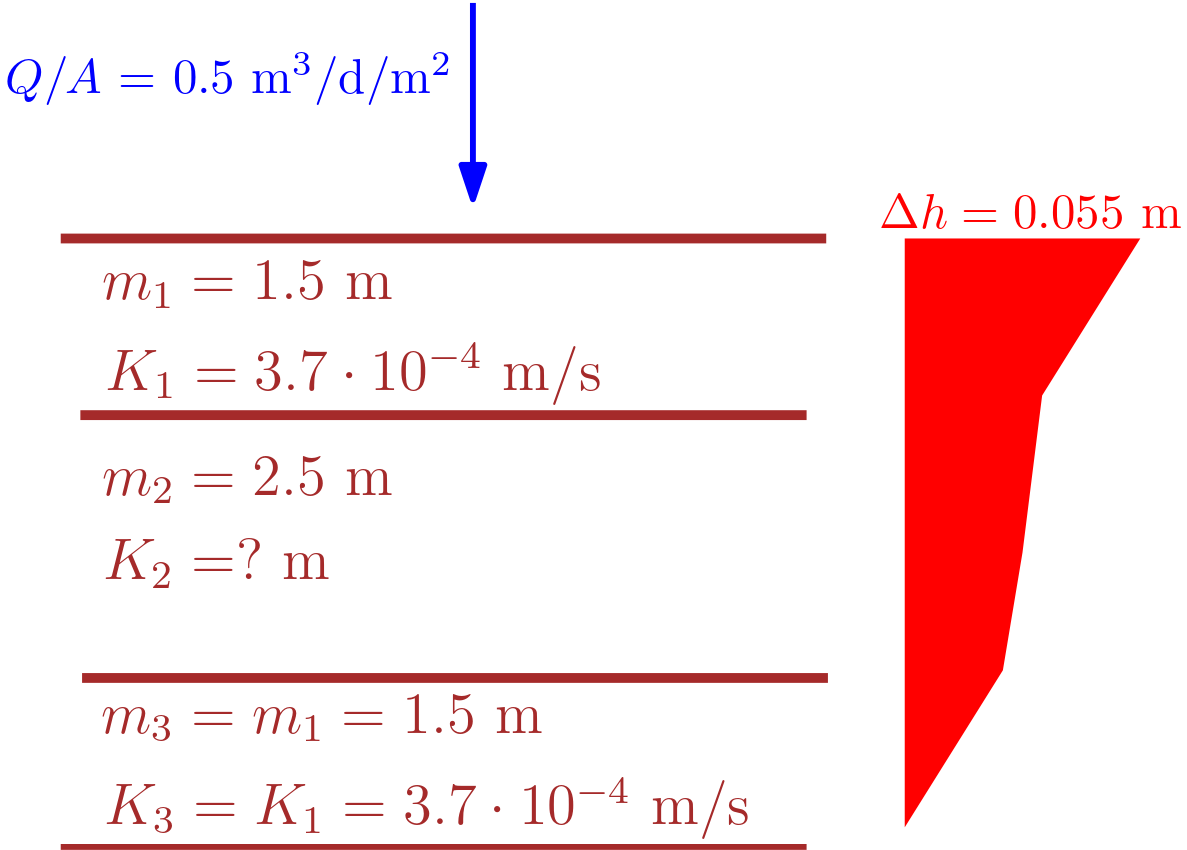

In [3]:
### Solution ###

col1 = pn.pane.Markdown("""The given problem can be visualized as:<br><br>""", styles={'font-size': '12pt'})

col2 = pn.pane.PNG("./images/T07_fH5.png", width=350, name="Well 1", align="center")

col3 = pn.pane.LaTeX(r"""


We will use Darcy's law for the homogeneous system, which is given as<br>
$$
Q/A = K_{eff} \cdot \Delta h/m
$$
where $m = 2\times m_1 + m_2$ is the total thickness

For vertical flow, the effective conductivity is $K_v$

$$
K_v = \frac{m}{\sum\limits_{i=1}^n\frac{m_i}{K_i}}
$$

$$
K_h = \frac{\sum\limits_{i=1}^n m_i\cdot K_i}{m}
$$

And for the inclined flow, the known relation fro $K_{eff}$ is

$$
K_\theta = \frac{1}{\frac{\cos^2\theta}{K_h}+ \frac{\sin^2\theta}{K_v}}
$$""", styles={'font-size': '12pt'})

pn.Column(col1, col2, col3)

In [4]:
# Given

Q_A = 500 # L/d/m^2, discharge/m^2
D_h = 5.5 # cm, head difference
m1= m3 = 1.5 # m, layer thickness for layer 1 and 3
K1= K3 = 3.7e-4 # m/s, Conductivity of layer 1 and 3
m2 = 2.5 # m, thickness of layer 2

# interim calculation
Q_Am = Q_A/1000 # m/d/m^2, discharge/m^2 - unit change
D_hm = D_h/100 # m, unit change, head difference
m = m1+m2+m3 # m, total thickness

# solution part a. (from the first equation above)

K_eff = Q_Am*m/D_hm # m/d, Q/A*m/Dh => Q/A is given
K_effs = K_eff/(24*60*60)

#output
print("\033[1m Result of HW Problem 5(a) are:\033[0m\n")
print("The effective conductivity is {0:0.1f}".format(K_eff), "m/d \n")
print("The effective conductivity is {0:0.2e}".format(K_effs), "m/s")



 Result of HW Problem 5(a) are:

The effective conductivity is 50.0 m/d 

The effective conductivity is 5.79e-04 m/s


In [5]:
# solution 5b and 5c

K_v = K_effs # m/s, Keff = Kv

# Re-organizing the second equation above
# Solution

K2 = m2/((m/K_v) - 2*(m1/K1)) # m/s, conductivity of layer 2

#output
print("\033[1m Result of HW Problem 5(a) is:\033[0m\n")
print("The conductivity of layer 2 is {0:0.2e}".format(K2), "m/s \n")

 Result of HW Problem 5(a) is:

The conductivity of layer 2 is 1.79e-03 m/s 



In [6]:
# Solution of part 5(c) and 5(d)

# 5(c) can be obtained from the third equation above.

K_h = (m1*K1+m2*K2+m3*K3)/m

# 5(d) can be obtained from the last equation above.

theta = 30 # degrees

# interim calculation 
theta_r = theta*np.pi/180 # radian, degree must be changed into radian

K_theta = 1/((np.cos(theta_r)**2/K_h)+ (np.sin(theta_r)**2/K_v))

# output

#output
print("\033[1m Result of HW Problem 5(c) and 5(d) are:\033[0m\n")
print("The effective horizontal conductivity is {0:0.2e}".format(K_h), "m/s \n")
print("The effective conductivity when the discharge is 30 degree inclined is {0:0.2e}".format(K_theta), "m/s")

 Result of HW Problem 5(c) and 5(d) are:

The effective horizontal conductivity is 1.02e-03 m/s 

The effective conductivity when the discharge is 30 degree inclined is 8.55e-04 m/s


Row
    [0] Markdown(str, styles={'font-size': '13pt'}, width=500)
    [1] PNG(str, width=400)
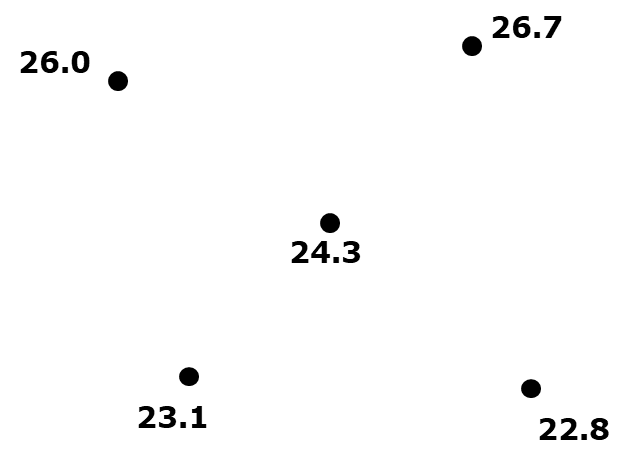

In [7]:
r10_1= pn.pane.Markdown("""
The figure below shows the position of five groundwater observation wells with measured hydraulic heads in m a.s.l. 
 <br><br>

**a.** Sketch head isolines for intervals of 1 m by applying the hydrologic triangle method.
<br><br>
**b.** Indicate the flow direction.<br><br>
""", width = 500, styles={'font-size': '13pt'})
r10_2 = pn.pane.PNG("images/T07_fH6.png", width=400)  

pn.Row(r10_1, r10_2)

Tabs
    [0] PNG(str, width=400)
    [1] PNG(str, width=400)
    [2] PNG(str, width=400)
    [3] PNG(str, width=400)
    [4] PNG(str, width=700)
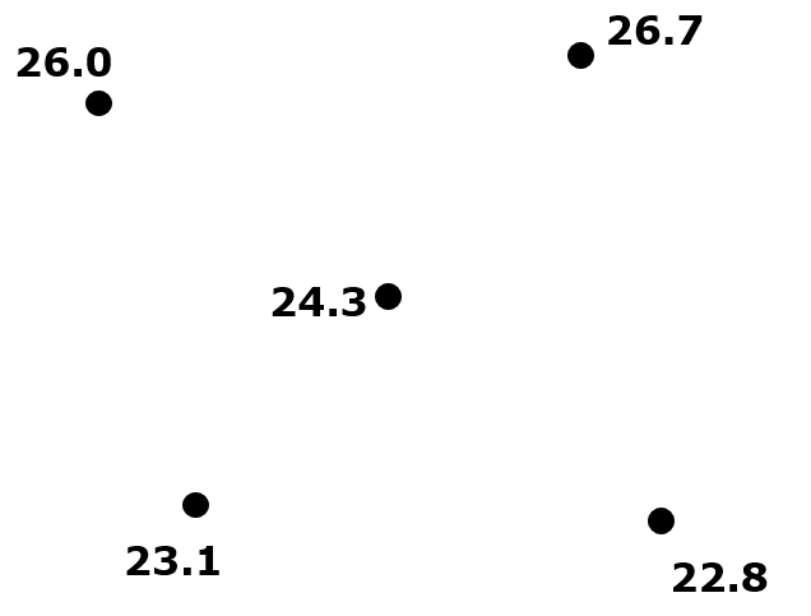
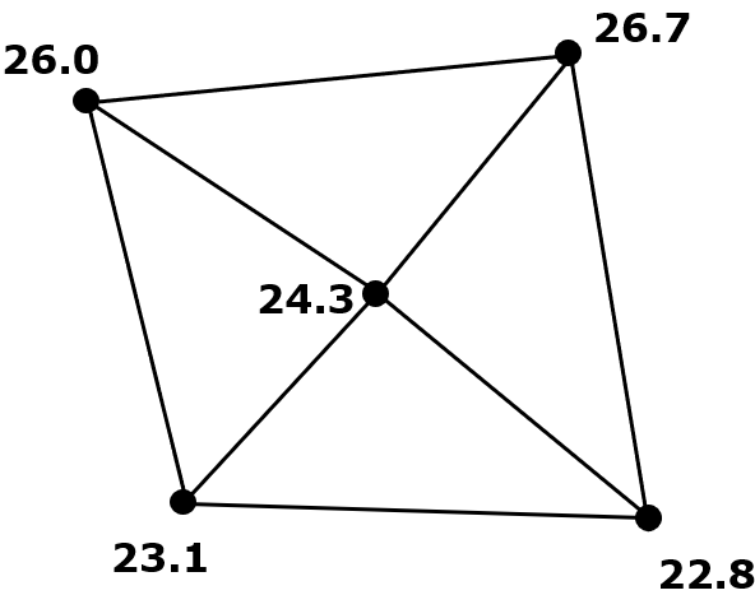
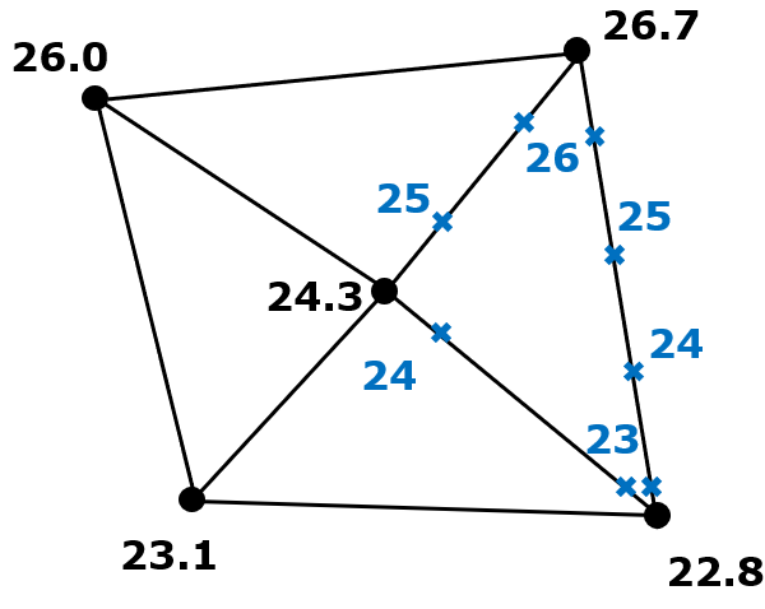
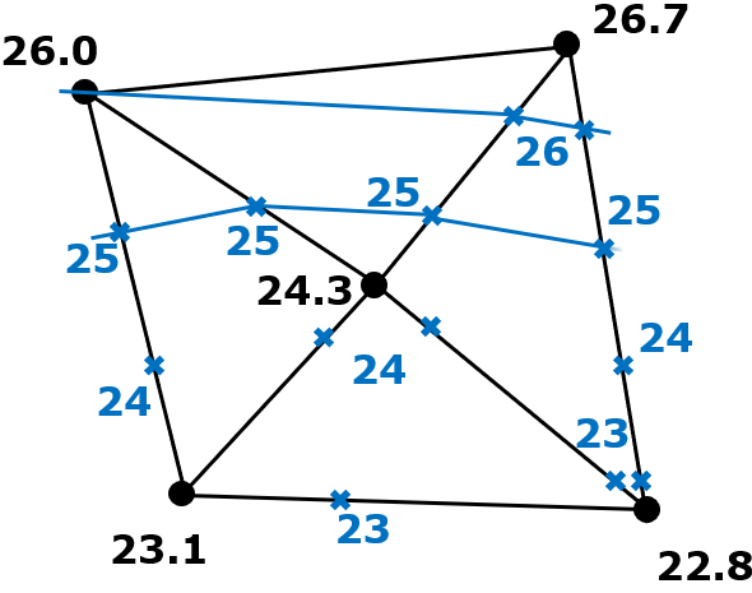
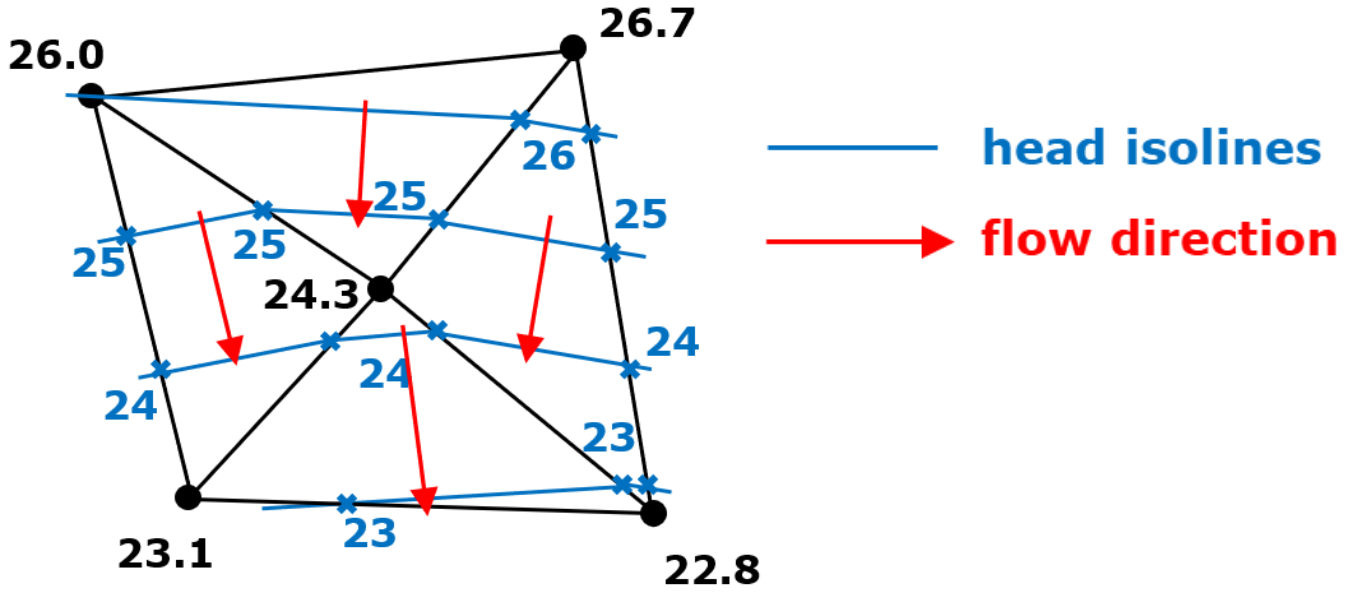

In [8]:
# solution

img_1 = pn.pane.PNG("images/T07_fH6a.png", width=400)
img_2 = pn.pane.PNG("images/T07_fH6b.png", width=400)
img_3 = pn.pane.PNG("images/T07_fH6c.png", width=400)
img_4 = pn.pane.PNG("images/T07_fH6d.png", width=400)
img_5 = pn.pane.PNG("images/T07_fH6e.png", width=700)

tabs = pn.Tabs(('Step 1', img_1), ("Step 2", img_2), ("Step 3", img_3), ("Step 4", img_4), ("Step 5", img_5) )
tabs

Column
    [0] Markdown(str, styles={'font-size': '12pt'}, width=900)
    [1] PNG(str, width=500)
    [2] Markdown(str, styles={'font-size': '12pt'}, width=900)
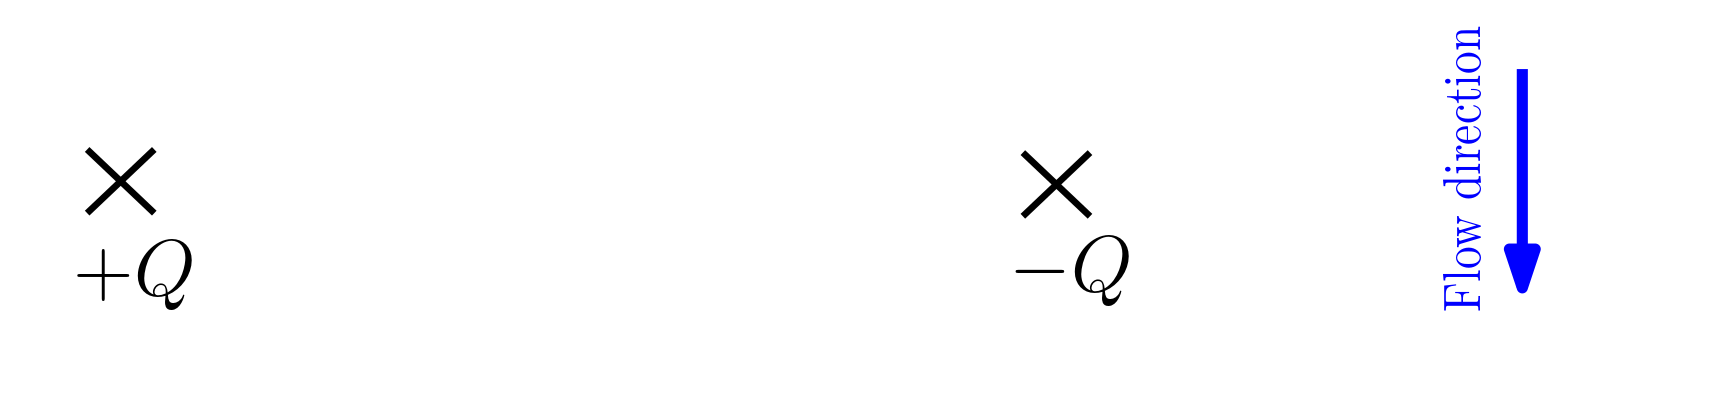

In [9]:
#
r11_1= pn.pane.Markdown("""
###Homework Problem 7: Flow Nets
Sketch head isolines and streamlines for the well doublette shown below. 
In this case, injection and withdrawal of groundwater is superimposed to a uniform flow component.
 <br><br><br>
 """, width = 900, styles={'font-size': '12pt'})

r11_2 = pn.pane.PNG("images/T07_fH8a.png", width=500)  

r11_3= pn.pane.Markdown("""
 <br><br>
 """, width = 900, styles={'font-size': '12pt'})
pn.Column(r11_1, r11_2, r11_3)

Column
    [0] Markdown(str, styles={'font-size': '12pt'}, width=900)
    [1] PNG(str, align='center', name='wells', width=600)
    [2] Markdown(str, styles={'font-size': '12pt'}, width=900)
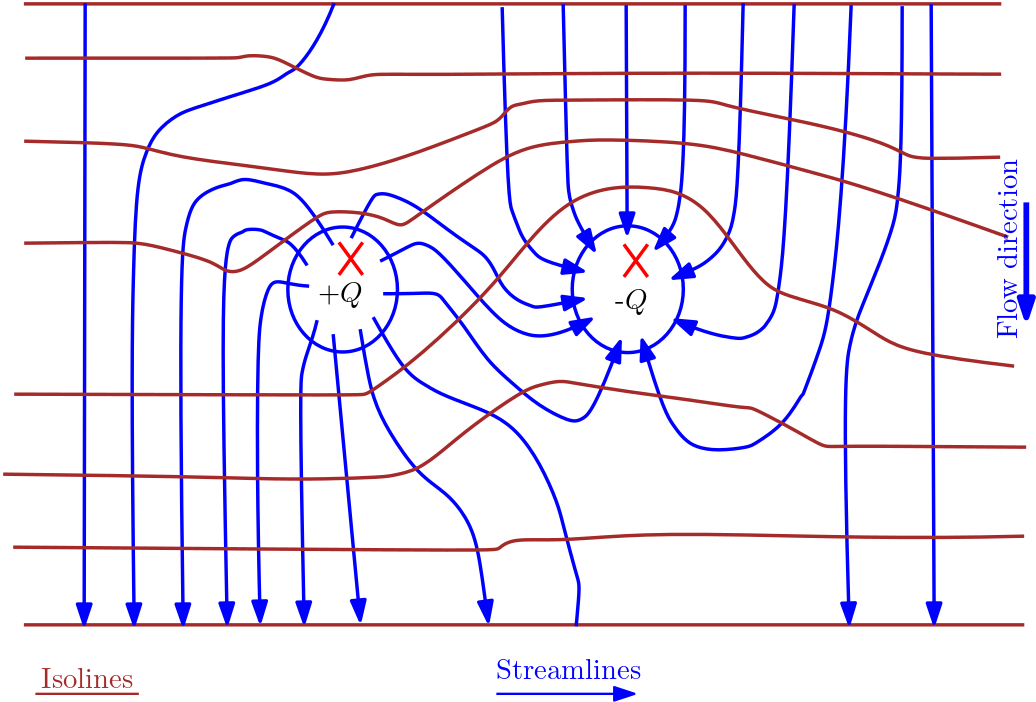

In [10]:
r11_1= pn.pane.Markdown("""
###Solution of Homework Problem 7
The flow-net of the above scenario can be as shown in the figure below:
<br><br><br>
 """, width = 900, styles={'font-size': '12pt'})

r11_2 = pn.pane.PNG("images/T07_fH8.png", width=600, align = "center", name= "wells")  

r11_3= pn.pane.Markdown("""
 <br><br>
 """, width = 900, styles={'font-size': '12pt'})
pn.Column(r11_1, r11_2, r11_3)

In [11]:
#
r3_1 = pn.pane.Markdown("""

A pumping test was conducted with a constant water withdrawal rate of 9 m³/h. The table shows the time-drawdown series recorded at an observation well which is located 9.85 m apart from the pumping well. The aquifer thickness is 5 m. 
Determine the storage coefficient, the transmissivity and the hydraulic conducti-vity by using the Theis method.
To this end, it is necessary to complete the table on the right such that data are made available for further steps (see next page).
<br><br><br> 
""",width = 600, styles={'font-size': '12pt'})  
#data
t_m =np.array([1, 2,    3,    4,    5,    7,    9,   12,   18,   23,   33, 41,   56,  126,  636, 1896])
s_m = np.array([0.01, 0.03, 0.05, 0.06, 0.07, 0.09, 0.12, 0.14, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.22, 0.3 , 0.32])


d = {'time (min)': t_m, 'drawdown (m)': s_m}
df = pd.DataFrame(data=d, index=None) 
df1= df.set_index('time (min)')
pn.Row(r3_1, df1)  

Row
    [0] Markdown(str, styles={'font-size': '12pt'}, width=600)
    [1] DataFrame(DataFrame)

In [12]:
# Problem 18 solution contd.
r3_2 = pn.pane.Markdown("""
As a first approach, the graphical solution of the problem is to be determined, i.e. double-logarithmic data and type curve sheets are compared as follows:
<br> <br> 

1. Plot data for _s_ vs. _t/r<sup>2</sup>_ in the data sheet.<br>

2. Determine coordinates of the match point _A_ on the type curve sheet, e.g. _1/u<sub>A</sub>_ = 1 and _W<sub>A</sub>_ = 1.<br>

3. Put the data sheet on top of the type curve sheet and shift it in parallel to the coordinate axes until data points 
fall on the type curve as close as possible.<br>
4. Determine coordinates of the match point _A_ on the data sheet: 

**_As our course is online this semester, we will follow the computational approach, see below:_**
""",width = 600, styles={'font-size': '12pt'})

#given
r = 9.85 # m, observation well distance
t_s = t_m*60 # s, converting time in s
t_r2 = t_s/r**2# s/m^2,  finding t/r^2 

#output
d2= {'time (s)': t_s, 'drawdown (m)': s_m, "t/r\u00b2 (s/m\u00b2)": t_r2}  
df2 = pd.DataFrame(data=d2) 
df3 = df2.set_index('time (s)')
pn.Row(r3_2, df3.head(10))  # only top 10 data shown

Row
    [0] Markdown(str, styles={'font-size': '12pt'}, width=600)
    [1] DataFrame(DataFrame)

In [13]:
print("\033[1m The given data:\033[0m\n")

Q_h = 9 # m^3/h - well discharge
m = 5 # m, aquifer thickness
r = 9.85 # m, observation- well location from pumping well

# interim calculation
Q_s = Q_h/3600 # m^3/s, unit- change of discharge

print("The avialable information in addition to data are:\n")
print("The well discharge, Q =  {} m\u00b3/s \n".format(Q_s))
print("The aquifer thickness, m =  {} m \n".format(m))
print("The Observation well location, r =  {} m \n".format(r))

 The given data:

The avialable information in addition to data are:

The well discharge, Q =  0.0025 m³/s 

The aquifer thickness, m =  5 m 

The Observation well location, r =  9.85 m 



In [14]:
from ipywidgets import interact, widgets # for interactive plot with slider
from scipy.special import expi #

def W(u):  
    return  -expi(-u) # provides the well function

def well_f(T, S_C, r, Q): # provides the fit curve for given r and Q
    
        
    # calculated function see L07-slide 31
    u_1d = 4*T*t_s/(S_C*r**2) # calculating 1/u
    w_ud = 4*np.pi*s_m*T/Q   # well function

    # plots
    u_1 = np.logspace(10,-1,250, base=10.0)
    w_u =W(1/u_1) 
    
    plt.figure(figsize=(9,6));
    plt.loglog(u_1, w_u); 
    plt.loglog(u_1d, w_ud, "o", color="red"  )
    plt.ylim((0.1, 10));plt.xlim(1, 1e5)
    plt.grid(True, which="both",ls="-") 
    plt.ylabel(r"W(u)");plt.xlabel(r"1/u")

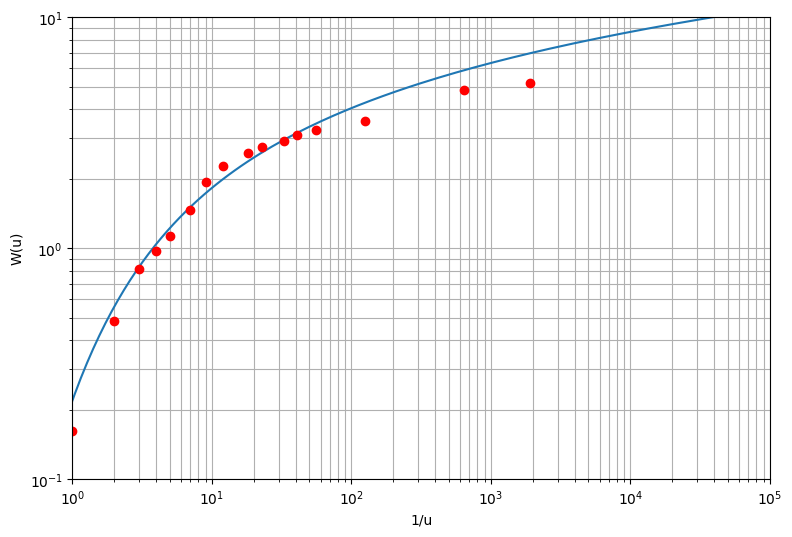

In [15]:
# select the starting value for T and S_c- this has to be iteratively done.

T = 0.00322 # m^2/S - check value for Transmissivity
S_c = 7.97e-03 # (-), the storage coefficient
Q = Q_s

well_f(T, S_c, r, Q)

In [16]:
# Compute condutivity based on the fit

K = T/m # m/s, conductivity of the aquifer.

print("The conductivity of the aquifer, K = {0:0.2e} m/s".format(K))

The conductivity of the aquifer, K = 6.44e-04 m/s


In [17]:
data19 = pd.read_csv("T07_TP19_data.csv", sep = ",", usecols =["Time (min)", "Drawdown (m)"])

df_t1= data19.values[:,0]
df_s1= data19.values[:,1]

d = {'time (min)': df_t1, 'drawdown (m)': df_s1}
df = pd.DataFrame(data=d, index=None) 
df.head(5)

,time (min),drawdown (m)
0,3.0,0.0915
1,5.0,0.2135
2,8.0,0.3965
3,12.0,0.6405
4,20.0,0.9760


In [18]:
#given

# make sure the time data is named "t_s" and drawdown is named s_m
t_s = df_t1*60 # s, converting time in sec
s_m = df_s1 # m, drawdown data

m_19 = 14.65 # m, aquifer thickness
Q_19 = 50 # m^3/h, pumping rate 
r_19 = 251.32 # m, distance of observation well

#interim calculation
t_19r2 = t_s/r_19**2 # s/m^2,  finding t/r^2 
Q_19s = Q_19/3600 # m^3/s, pumping rate in s- unit change

#output
d2= {'time [min]': df_t1, 'drawdown [m]': df_s1, "t/r\u00b2 (s/m\u00b2)": t_19r2}  
df2 = pd.DataFrame(data=d2, index=None) 
df2.head(5)

,time [min],drawdown [m],t/r² (s/m²)
0,3.0,0.0915,0.002850
1,5.0,0.2135,0.004750
2,8.0,0.3965,0.007600
3,12.0,0.6405,0.011399
4,20.0,0.9760,0.018999


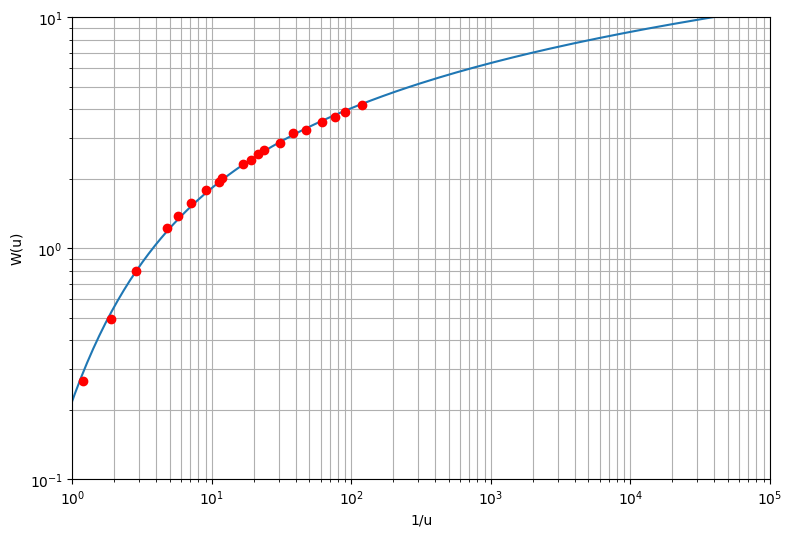

In [19]:
# Fitting the typ curve

# Trial data - chage T and S_c data to fit the curve

T_19 = 0.00138 # m^2/s, transmissivity
S_19= 2.21e-05 # (-), storage coefficient

# fit -  make sure to write the variable name correctly

well_f(T_19,S_19,r_19, Q_19s) 

In [20]:
# Solutions and output

K_19 = T_19/m_19

#output
print("\033[1m The results are:\033[0m\n")
print("The Transmissivity at the site is: {0:1.2e}".format(T_19), "m\u00b2/s\n")
print("The Storage coefficient at the site is: {0:1.3e}".format(S_19), "\n")  
print("The Conductivity at the site is: {0:1.1e}".format(K_19), "m/s") 

 The results are:

The Transmissivity at the site is: 1.38e-03 m²/s

The Storage coefficient at the site is: 2.210e-05 

The Conductivity at the site is: 9.4e-05 m/s


In [21]:
# solution 19(b) and 19(c)

# Given 
r_19w = 0.3 # m, radius of the well
t_19m = 500 # min, given time in min, 

#interm calculation
t_19s = t_19m*60 # s, tive converted to second

#Calculations
u_19 = (S_19*r_19w**2)/(4*T_19*t_19s)
W_19b = -0.5772 - np.log(u_19)+u_19 # using the given approximate of W(u)
s_19b = (Q_19s*W_19b)/(4*np.pi*T_19) # see L07 - slide 32

# Solution of 19C: 
#How big is the radius of influence according to Siechardt‘s equation? 
# (L07, slide 27)

R_19 = 3000*s_19b*np.sqrt(K_19) 

#output
print("\033[1m The results are:\033[0m\n")
print("u = {0:1.2e}".format(u_19), "\n")
print("W(u)= {0:1.2f}".format(W_19b), "\n")  
print("The drawdonw at the site is: {0:1.2f}".format(s_19b), "m \n")
print("The radius of influence is is: {0:1.2f}".format(R_19), "m")

 The results are:

u = 1.20e-08 

W(u)= 17.66 

The drawdonw at the site is: 14.14 m 

The radius of influence is is: 411.83 m


In [22]:
# Functions to generate well-function (this is another method based on scipy library)

from scipy.special import expi
def W(u): 
    return -expi(-u)

#Generate your data and function required to solve

def data(Q, DOB, S, T):

    '''
    Q = pumping rate in m^3/s, 
    DOB- date of birth (ddmmyyyy), 
    S = Storage Coeff. and 
    T = Transmissivity (m^2/s)
    '''
    S_dob = sum(int(DOB) for DOB in str(DOB)) # add numbers in your DOB
    d_t = np.array([3.5, 5, 6.2, 8, 9.2, 12.4, 16.5, 20, 30, 60, 100, 200, 320, 380, 500])
    d_d = np.array([0.12, 0.23, 0.31, 0.41, 0.47, 0.64, 0.82, 0.92, 1.2, 1.74, 2.14, 2.57, 3, 3.1, 3.34])
    data_t = d_t/(S_dob/22)**3 # min, time based on DOB
    data_d = d_d/(S_dob/22) # m, drawdown data based on DOB
    dist = 251/(S_dob/22) # m, distance to observation well based on DOB
    Aq_t = 15/(S_dob/22) # m, aquifer thickness based on DOB
    
    i_u = (4*T*data_t*60)/(S*dist**2) 
    W_u = (4*np.pi*data_d*T)/(Q)
    return i_u, W_u

Row
    [0] DataFrame(DataFrame)
    [1] Matplotlib(Figure, dpi=100)
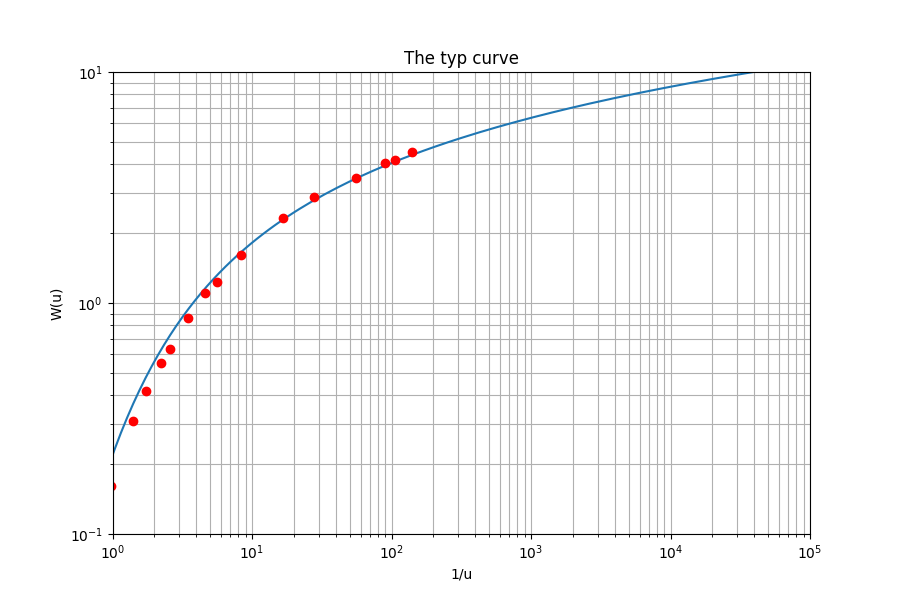

In [23]:
#Solution 
#Q = pumping rate in m^3/s, DOB- date of birth (ddmmyyyy), S = Storage Coeff. and T = Transmissivity (m^2/s)
# Change the value in the bracket to find the fit

i_u, W_u = data(Q=2.41E-02, DOB=11111945, S=3.53e-05, T = 2.70e-03)

#interim calculation to get typ-curve
u_1 = np.logspace(10,-1,250, base=10.0) # setting the value of u
w_u =W(1/u_1) # finding W(1/u) : as we use 1/u in the typ curce

# Output
dx_1 = {"1/u":i_u, "W(u)":W_u}; dfx_a = pd.DataFrame(dx_1); figs = plt.figure(figsize=(9,6)) 
plt.loglog(u_1, w_u) # typ curve
plt.loglog(i_u, W_u, "ro" ) # your data
plt.title("The typ curve"); plt.ylim((0.1, 10)); plt.xlim(1, 1e5)
plt.grid(True, which="both",ls="-"); plt.ylabel(r"W(u)");plt.xlabel(r"1/u"); plt.close()
rx_2 = pn.pane.Matplotlib(figs, dpi=100); pn.Row(dfx_a, rx_2) 